# Task 1 

A Hamming number is a positive number that has no prime factor larger than 5.

So the first few Hamming numbers are 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15.

There are 1105 Hamming numbers not exceeding $10^8$.

We will call a positive number a generalized Hamming number of type n if it has no prime factor larger than
n.

Hence the Hamming numbers are the generalized Hamming numbers of type 5.

How many generalized Hamming numbers of type 100 are there which don't exceed $10^9$?

## Answer: 120319643


In [3]:
import numpy as np
import time
import sys 

# here we shall use numpy arrays and vectorized calculations 
# for implementation of sieve of eratosthenes
# using int8 type as the smallest possible type
# in order to store values 0 or 1
x = np.zeros((10 ** 9 + 1,), dtype='int8')
sys.getsizeof(x) # it's only 1 GB +- 1e-5% memory

1000000097

In [4]:
# sieve of eratosthenes using numpy slices
start = time.time()
for i in range(2, 100):
    x[::i] = 1
    
# 0 and 1 shouldn't be counted 
# only 18 seconds and we get the answer
print('answer:', len(x[x==0])-2)    
print(f'time elapsed: {(time.time() - start):.3}s')

answer: 120319643
time elapsed: 18.9s


# Task 2

A positive integer n is called **squarefree** if no square of a prime divides n. Of the twelve distinct numbers in
the first eight rows of Pascal's triangle, all except 4 and 20 are squarefree. The sum of the distinct squarefree
numbers in the first eight rows is 105.

Find the sum of the distinct squarefree numbers in the first 51 rows of Pascal's triangle.

## Answer: 34029210557338

In [5]:
from scipy.special import binom 

# Gives approximate solution since this func calculates 
# binomial coefficient using exact formula without long 
# arithmetics.
# Therefore, this function isn't appropriate
binom(51, 22)   

156077261327400.03

In [75]:
# None of built-in functions for binomial coefficient calculation use 
# recursion formula. Instead all of them use exact form with factorials, 
# which seems to be a bad solution for large (n, k) 
# due to slow long-integers calculations

__cache = {}

# lazy recursion version of binomial coefficient 
def binomial(n,k):
    if (n, k) not in __cache: 
        __cache[n, k] = 1 if k==0 else (0 if n==0 else binomial(n-1, k) + binomial(n-1, k-1))
    
    return __cache[n, k]


In [78]:
from math import comb

# however, math.comb works in a moment due to its C implementation 
# even for large n! value
start = time.time()
print(comb(30000, 10))
print(f'time elapsed: {(time.time() - start):.3}s')

162479286706452441433253044846236747000
time elapsed: 0.000534s


In [77]:
# whereas recursion version takes 0.1s for smaller value 
# and it breaks on n >= 3000 due to max recursion depth exceeding
# (which can be fixed, but anyway it's slow)
start = time.time()
print(binomial(2900, 10))
print(f'time elapsed: {(time.time() - start):.3}s')

11414858256543956456268686660
time elapsed: 0.101s


In [81]:
# therefore, just use built-in math.comb method and 
# build the entire Pascal triangle using brute force
distinct = set()
start_time = time.time()
for i in range(1, 51):
    for j in range(i, 51):
        distinct.add(comb(j, i))

        
print(f'time elapsed: {(time.time() - start_time):.3}s')
print('values: {', end='')
print(*list(distinct)[:3], '...', *list(squarefree)[-3:], end='', sep=', ')
print('}')

time elapsed: 0.00243s
values: {1, 2, 3 ... 1533939, 346104, 20475}


In [101]:
# now let's find all the squarefree binomial coefficients 
# using built-in sage function $factor$ in order to 
# check all prime dividers 
squarefree = set()

start_time = time.time()
for el in distinct:
    # means that every prime factor appears only once
    if '^' not in str(factor(el)):
        squarefree.add(el)
        
print(f'time elapsed: {(time.time() - start_time):.3}s')
print("amount of distinct squarefree binomial coefficients:", len(squarefree))
print('values: {', end='')
print(*list(squarefree)[:3], '...', *list(squarefree)[-3:], end='', sep=', ')
print('}')
print("sum:", sum(squarefree))

time elapsed: 0.0521s
amount of distinct squarefree binomial coefficients: 158
values: {1, 2, 3, ..., 1533939, 646646, 66045}
sum: 34029210557338


# Task 3 
k Distinct Integers With Target Sum
The goal of this question is to produce, in C/C++ or Python, an algorithm that given a list of integers prints k
distinct integers that form the target sum.

The input is a text file that should be read by your program, and has the following format:

3  

51 

7  

3  

6  

10 

43 

54 

2  

where the first line in the file is k, the second line is the target sum, and the rest of the lines are the potential
integers to be summed.

In the above example, your program should find the 3 numbers:

6

43

2
because they are distinct and add up to 51. The order of the numbers found is
irrelevant.

This question has two parts:
  1. Implement a brute-force solution. What's the running time of this solution,
        as a function of n and k, where n in the length of the input set?
  2. Implement a more time efficient solution - ideally a solution with lowest
        possible running time. What's the running time of your solution? Do you think it's possible to do
        better? Why or why not?
        
        
## Answer

Given problem is a well-known **subset sum fixed size problem**, which is partial case of another well-known **subset sum problem**. The only difference is that the second one doesn't have condition on size of subset. 

Since **subset sum problem** is NP-complete, its time complexity is $O(2^n)$ in the worst case, where $n$ is the amount of given numbers and the only correct algorithm for it is optimized brute-force (a.k.a. dynamic programming, a.k.a. lazy recursion). 

Similarly, partial case has time complexity $O({n \choose k})$ in the best case, where $k$ is required size of subset. 

$$\dfrac{n^k}{k^k} \le {n \choose k} \le \dfrac{n^k}{k!} < \dfrac{n * e}{k}^k$$

In [108]:
from itertools import combinations 
import random 


def target_sum_bf(amount, target, allowed):
    """Brute-force algorithm solving subset-sum fixed size problem.
    
    Time complexity, according to official documentation of itertools.combinations, 
    is O(k (n choose k)) due to returns of the result combinations. 
    
    Since itertools.combinations is written in C, this function 
    seems to be the most efficient pure Python algorithm for solving the 
    given problem in the average case for big n, k. 
    """
    for el in combinations(allowed, amount): 
        if sum(el) == target: 
            return set(el)
    return set()


def read_parameters(filename):
    """Read parameters from file according to conditions
    given in task.
    """
    with open(filename, 'r') as file:
        amount = int(file.readline())
        target = int(file.readline())
        allowed = set() 
        for line in file: 
            allowed.add(int(line))
    return amount, target, allowed

### Let's test

In [104]:
def generate_correct_parameters(n, k, save_filename=None):
    """Generate random parameters for the subset sum fixed size problem, 
    where presence of required subset is guaranteed."""
    target = random.randrange(n, n ** 2)
    res = set(range(1, k))
    res.add(target - sum(res))
    for _ in range(n-k):
        while (tmp := random.randrange(1, n ** 2)) in res:
            pass
        res.add(tmp)
        
    if save_filename is not None: 
        with open(save_filename, 'w') as file: 
            print(k, target, *res, sep='\n', file=file, end='')
    return k, target, res 


def generate_parameters(n, k, save_filename=None):
    """Generate random parameters for the subset sum fixed size problem."""
    target = random.randrange(n, n**2)
    res = set() 
    for _ in range(n):
        while (tmp := random.randrange(1, n ** 2)) in res:
            pass
        res.add(tmp)
    
    if save_filename is not None: 
        with open(save_filename, 'w') as file: 
            print(k, target, *res, sep='\n', file=file, end='')
            
    return k, target, res
    

print(generate_correct_parameters(10, 3, save_filename='input.txt'))
print(generate_parameters(10, 3))

(3, 22, {1, 2, 3, 34, 42, 76, 19, 51, 22, 89})
(3, 59, {69, 73, 59, 84, 53, 25, 27, 60, 29, 95})


### Results of experiment

As expected, time function has exponential and polynomial growth corresponding to k and n respectively. 
We can observe that even for $n=40$ and $k=8$ algorithm takes quite much time to compute (50 seconds). 



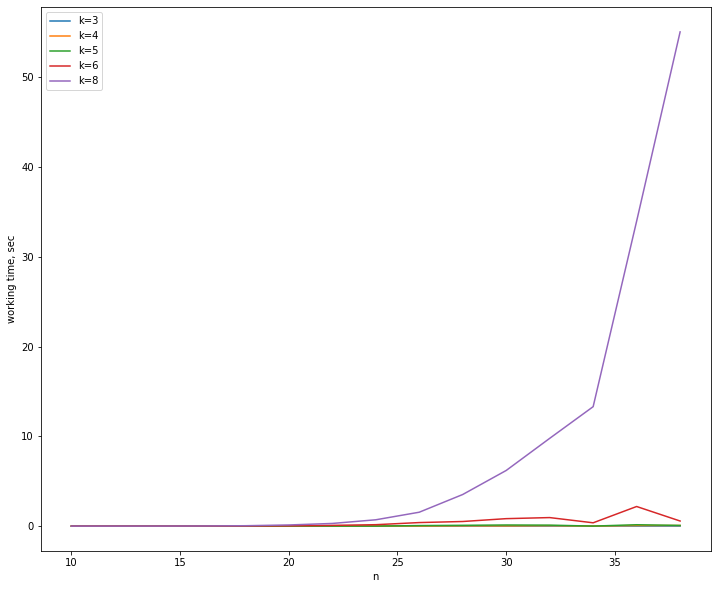

In [106]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 10))

x = np.arange(10, 40, 2)

for k in [3, 4, 5, 6, 8]:
    y_k = []    
    for n in x:
        _, target, allowed = generate_parameters(n, k)
        start = time.time() 
        target_sum_bf(k, target, allowed)
        y_k.append(time.time() - start)
    
    plt.plot(x, y_k, label=f'k={k}')

plt.ylabel('working time, sec')
plt.xlabel('n')
plt.legend(loc='best')
plt.show()

## Let's try c++ version

In [1]:
!bat ./task3.cpp --theme GitHub

───────┬────────────────────────────────────────────────────────────────────────
       │ File: ./task3.cpp
───────┼────────────────────────────────────────────────────────────────────────
   1   │ #include <iostream>
   2 _ │ #include <fstream>
   3   │ #include <map>
   4   │ #include <vector>
   5   │ #include <tuple>
   6   │ #include <algorithm>
   7   │ 
   8   │ // map <(n, k, target_sum)>
   9   │ std::map<std::tuple<int, int, int>, std::vector<int>> __cache;
  10   │ 
  11   │ 
  12   │ // auxiliary recursive function
  13   │ std::vector<int> _target_sum(int n, int k, int target, std::vector<int>
       │  allowed);
  14   │ 
  15   │ /* Solve subset sum fixed size problem using lazy recursion.
  16   │  *
  17   │  * @param n - amount of least numbers from $allowed$, which function ca
       │ n use
  18   │  * @param k - required size of subset
  19   │  * @param target - target sum
  20   │  * @param allowed - constant array of allowed numbers
  21   │  */
  22   │ std::ve

### C++ works much faster: 0.01s vs 30.1s on Python 

In [150]:
_ = generate_parameters(40, 8, save_filename='input.txt')

In [151]:
!time ./a.out input.txt >> /dev/null

0.01user 0.00system 0:00.01elapsed 86%CPU (0avgtext+0avgdata 3564maxresident)k
0inputs+0outputs (0major+181minor)pagefaults 0swaps


In [155]:
start = time.time() 
target_sum_bf(*read_parameters('input.txt'))
print(f'time elapsed: {(time.time() - start):.3}s')

time elapsed: 30.1s


In [139]:
_ = generate_parameters(40, 11, save_filename='input.txt')

In [140]:
!time ./a.out input.txt >> /dev/null

7.65user 0.05system 0:07.71elapsed 99%CPU (0avgtext+0avgdata 59396maxresident)k
0inputs+0outputs (0major+14143minor)pagefaults 0swaps


### However it's not enough for big n and k anyway. Possible improvement: lazy recursion + threding

In [149]:
_ = generate_parameters(60, 20, save_filename='input.txt')

In [148]:
!time ./a.out input.txt >> /dev/null

^C
Command terminated by signal 2
85.09user 0.42system 1:25.54elapsed 99%CPU (0avgtext+0avgdata 503896maxresident)k
0inputs+0outputs (0major+125313minor)pagefaults 0swaps
